In [2]:
from __future__  import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")


Populating the interactive namespace from numpy and matplotlib


I am using geopanda. that is **not required** for this particular exercise, but geopand works with geospacial data: the shape files that we get from pluto for example.

PLEASE REMEMBER: seed your random functions if you need to use any, label your axes clearly, comment your code, use PEP8!


## An interesting urban question is "can we measure and predict energy use based on observables that are easier to be acquired". For example the urban observatory at CUSP can monitor lights: they are a realtively easy observable. All you need is a camera, and a pipeline to process your data. But how does the light coming from a window relate to the total energy consumption? We generally postulate that light is a proxy for occupancy, and that occupancy is a good predictor of energy consumption.
## So let's test if the last link holds. If we have data on the energy consumed by a __building__ how well does that relate to the number of units in the building?

## Data on energy consumption can be found here for the city of NY https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z  

## Either obtain the data through the API or download the csv file, and move it to $PUIDATA

## However this datasets does not have the number of units. We can find that in the Pluto dataset.

## Reading in the Pluto data for manhattan, which will give me the number of units ber building   Manhattan/MNMapPLUTO.shp

In [3]:
path = os.getenv('PUIDATA')+'/'
path

'/home/cusp/tw1574/PUIdata/'

In [4]:
fname = "energy.csv"
fname

'energy.csv'

In [2]:
!wget "https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD" -O "{path}{fname}"

--2016-10-21 19:35:37--  https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us... 52.206.68.26
Connecting to data.cityofnewyork.us|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: “{path}”

    [       <=>                             ] 3,184,830   2.39M/s   in 1.3s    

Last-modified header invalid -- time-stamp ignored.
2016-10-21 19:35:39 (2.39 MB/s) - “{path}” saved [3184830]



In [48]:
nrg = pd.read_csv(path+fname)

nrg.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [31]:
#!rm "{path}{fname}"

In [49]:
bsize = pd.read_csv('/projects/open/Student/pluto/PLUTO_MN.csv')
bsize.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,18,19,20,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,MN,1,10,101,5.0,1018.0,2.0,1.0,10004.0,E007,...,190478.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,13v2
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,190585.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,13v2
2,MN,1,201,101,1.0,1000.0,2.0,NaN,10004.0,E007,...,193654.0,12b,NaN,199 999,10101.0,NaN,0.0,NaN,1,13v2
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,12b,NaN,199 999,10101.0,NaN,0.0,NaN,4,13v2
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,12b,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,13v2


In [50]:
nrg.columns

Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [51]:
bsize.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'LtdHeight', 'AllZoning1', 'AllZoning2',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptLand', 'ExemptTot', 'YearBuilt', 'BuiltCode', 'YearAlter1',
       'YearAlter2', 'HistDist', 'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR',
       'FacilFAR', 'BoroCode', 'BBL', 'CondoNo', 'Tract2010', 'XCoord',
       'YCoord', 'ZoneMap', 'ZMCode', 

In [52]:
#dropping the columns from nrg I no longer need
nrg = nrg[['Zip Code','NYC Borough, Block, and Lot (BBL)','DOF Property Floor Area (Buildngs and Parking)(ft2)','DOF Number of Buildings','Site EUI(kBtu/ft2)','Reported Property Floor Area (Building(s)) (ft²)']]
nrg.head()

,Zip Code,"NYC Borough, Block, and Lot (BBL)",DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,NaN,1.000410e+09,NaN,NaN,NaN,918919
1,11375.0,4.021460e+09,82730.0,1.0,NaN,NaN
2,NaN,2.027620e+09,NaN,NaN,NaN,64200
3,10001.0,1.006700e+09,440360.0,1.0,NaN,NaN
4,NaN,2.048300e+09,NaN,NaN,NaN,50000


In [53]:
#dropping the columns from bsize I no longer need
bsize = bsize[['UnitsTotal','BBL']]
bsize.head()

,UnitsTotal,BBL
0,0,1000010010
1,0,1000010101
2,0,1000010201
3,0,1000010301
4,0,1000010401


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff81c7bbb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff81c4f7978>]], dtype=object)

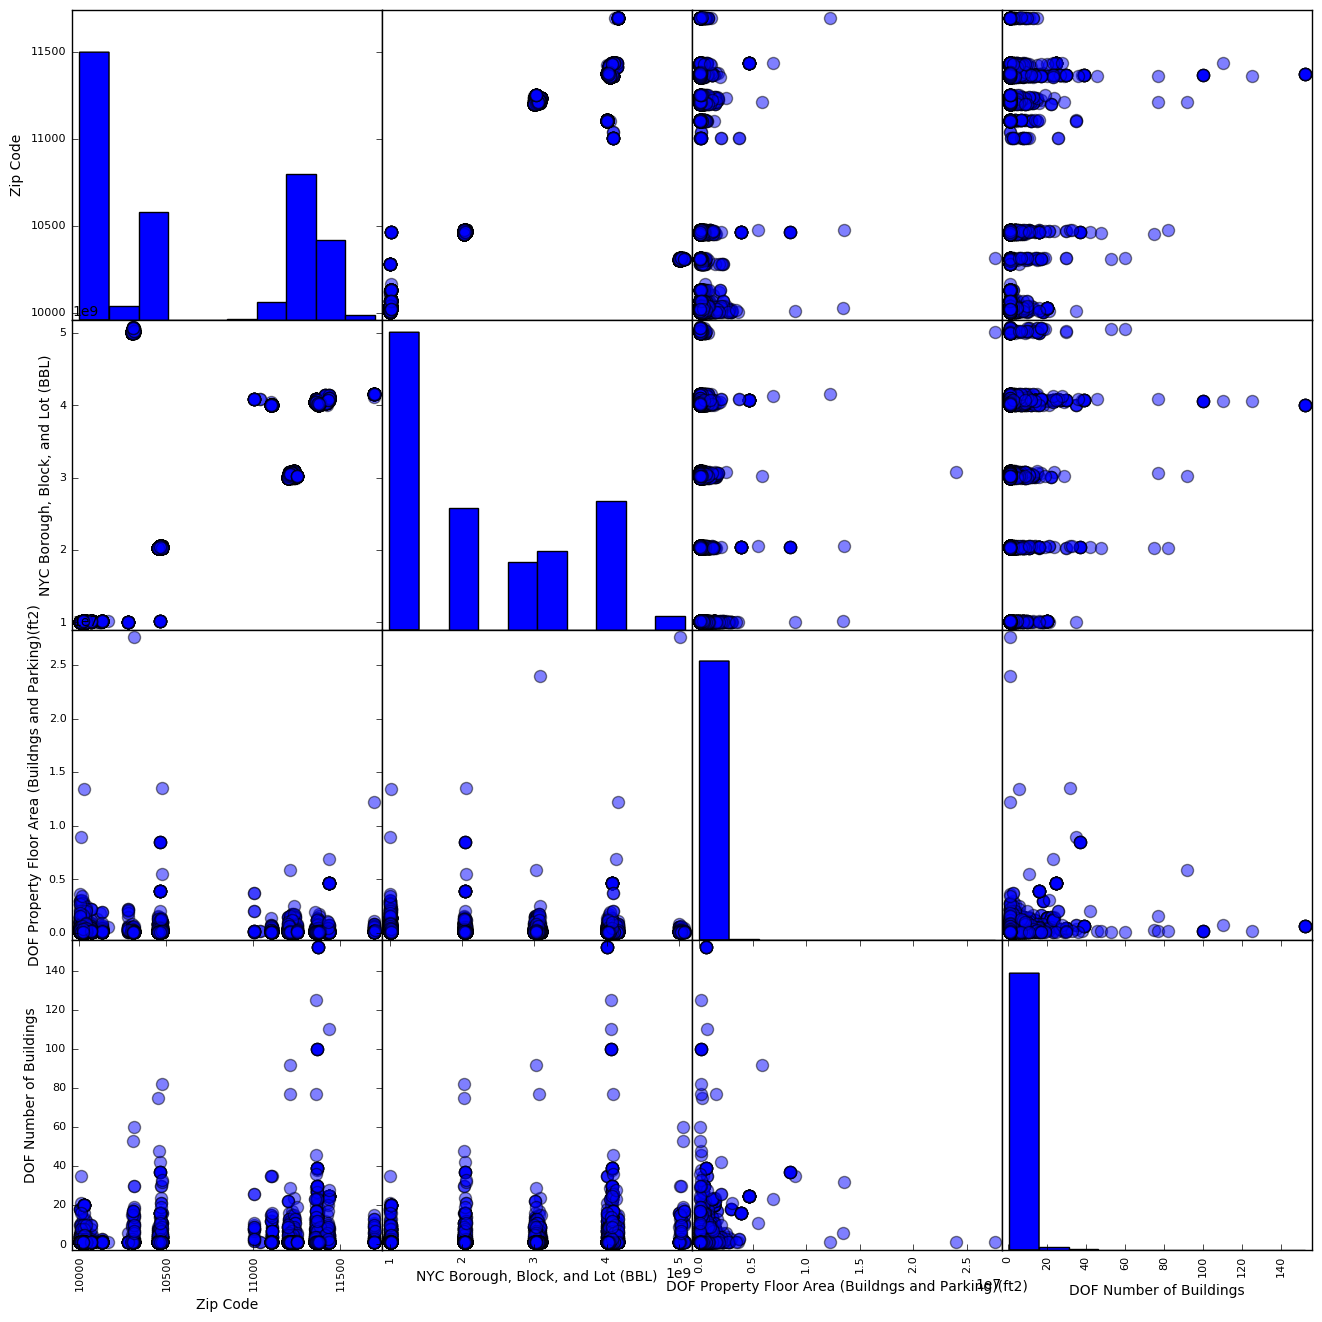

In [54]:
#try make a scatter plot of nrg. Few columns will plot
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

Figure 1: scatter matrix of all numerical values in the files.

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: i need to remove all values that cannot conver to float in order to use the columns and convert them to float arrays and do math with them.
Below I created a function that returns True if what is passed as argument can be converted to a float, and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into.
This has to be done entry by entry: if you give it a series you get error "cannot convert the series to..."
However you can pass it a whole array by using it in conjunction with np.vectorize (look up the syntax!) which will implement a for loop for you under the hood to pass the series entry by entry to your function.

In [55]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
        

Now for every column I care about I can create an array, call it for eg. indx, of True and False (a Boolean array) that i can use as an index to pick entries that I want to use from my arrays of interest. 

I can replace the entries that failed to be converted to 'NaN'
(because my function return Trues when I can convert and False otherwise i actuallly want the complementary array: ~indx) 

In [56]:
#example
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')
#do it for however many columns you need

invalid entries changed to NaN 15513


In [57]:
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors='coerce')
nrg['Reported Property Floor Area (Building(s))'] = pd.to_numeric(nrg['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')

In [58]:
nrg['total_energy'] = nrg['Site EUI(kBtu/ft2)'] * nrg['Reported Property Floor Area (Building(s))']

In [59]:
nrg.columns

Index(['Zip Code', 'NYC Borough, Block, and Lot (BBL)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'DOF Number of Buildings', 'Site EUI(kBtu/ft2)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'Reported Property Floor Area (Building(s))', 'total_energy'],
      dtype='object')

In [60]:
nrg.head()

,Zip Code,"NYC Borough, Block, and Lot (BBL)",DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),Reported Property Floor Area (Building(s)),total_energy
0,NaN,1.000410e+09,NaN,NaN,NaN,918919,918919.0,NaN
1,11375.0,4.021460e+09,82730.0,1.0,NaN,NaN,NaN,NaN
2,NaN,2.027620e+09,NaN,NaN,NaN,64200,64200.0,NaN
3,10001.0,1.006700e+09,440360.0,1.0,NaN,NaN,NaN,NaN
4,NaN,2.048300e+09,NaN,NaN,NaN,50000,50000.0,NaN


In [61]:
# rename BBL column for nrg dataframe
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)':'BBL'}, inplace=True)
nrg.columns

Index(['Zip Code', 'BBL',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'DOF Number of Buildings', 'Site EUI(kBtu/ft2)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'Reported Property Floor Area (Building(s))', 'total_energy'],
      dtype='object')

In [62]:
# merge dataframes
bblnrgdata = pd.merge(nrg, bsize, on='BBL', how='inner')

In [63]:
bblnrgdata.columns

Index(['Zip Code', 'BBL',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'DOF Number of Buildings', 'Site EUI(kBtu/ft2)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'Reported Property Floor Area (Building(s))', 'total_energy',
       'UnitsTotal'],
      dtype='object')

In [64]:
bblnrgdata[bblnrgdata!=0]
bblnrgdata.head()

,Zip Code,BBL,DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),Reported Property Floor Area (Building(s)),total_energy,UnitsTotal
0,NaN,1.000410e+09,NaN,NaN,NaN,918919,918919.0,NaN,1
1,10001.0,1.006700e+09,440360.0,1.0,NaN,NaN,NaN,NaN,1
2,10009.0,1.004370e+09,52390.0,1.0,NaN,NaN,NaN,NaN,21
3,10022.0,1.013110e+09,313200.0,1.0,125.4,330000,330000.0,41382000.0,56
4,NaN,1.006460e+09,NaN,NaN,NaN,69160,69160.0,NaN,1


In [65]:
bblnrgdata.dropna(subset=['total_energy'], inplace=True)
bblnrgdata.head()

,Zip Code,BBL,DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),Reported Property Floor Area (Building(s)),total_energy,UnitsTotal
3,10022.0,1.013110e+09,313200.0,1.0,125.4,330000,330000.0,41382000.0,56
12,NaN,1.010140e+09,NaN,NaN,154.9,841709,841709.0,130380724.1,2
17,10011.0,1.007660e+09,53168.0,1.0,122.3,59468,59468.0,7272936.4,8
18,10018.0,1.008150e+09,364000.0,1.0,117.0,364000,364000.0,42588000.0,24
20,10013.0,1.005050e+09,214110.0,1.0,82.1,235370,235370.0,19323877.0,24


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff81c4a14a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff8171fb6a0>]], dtype=object)

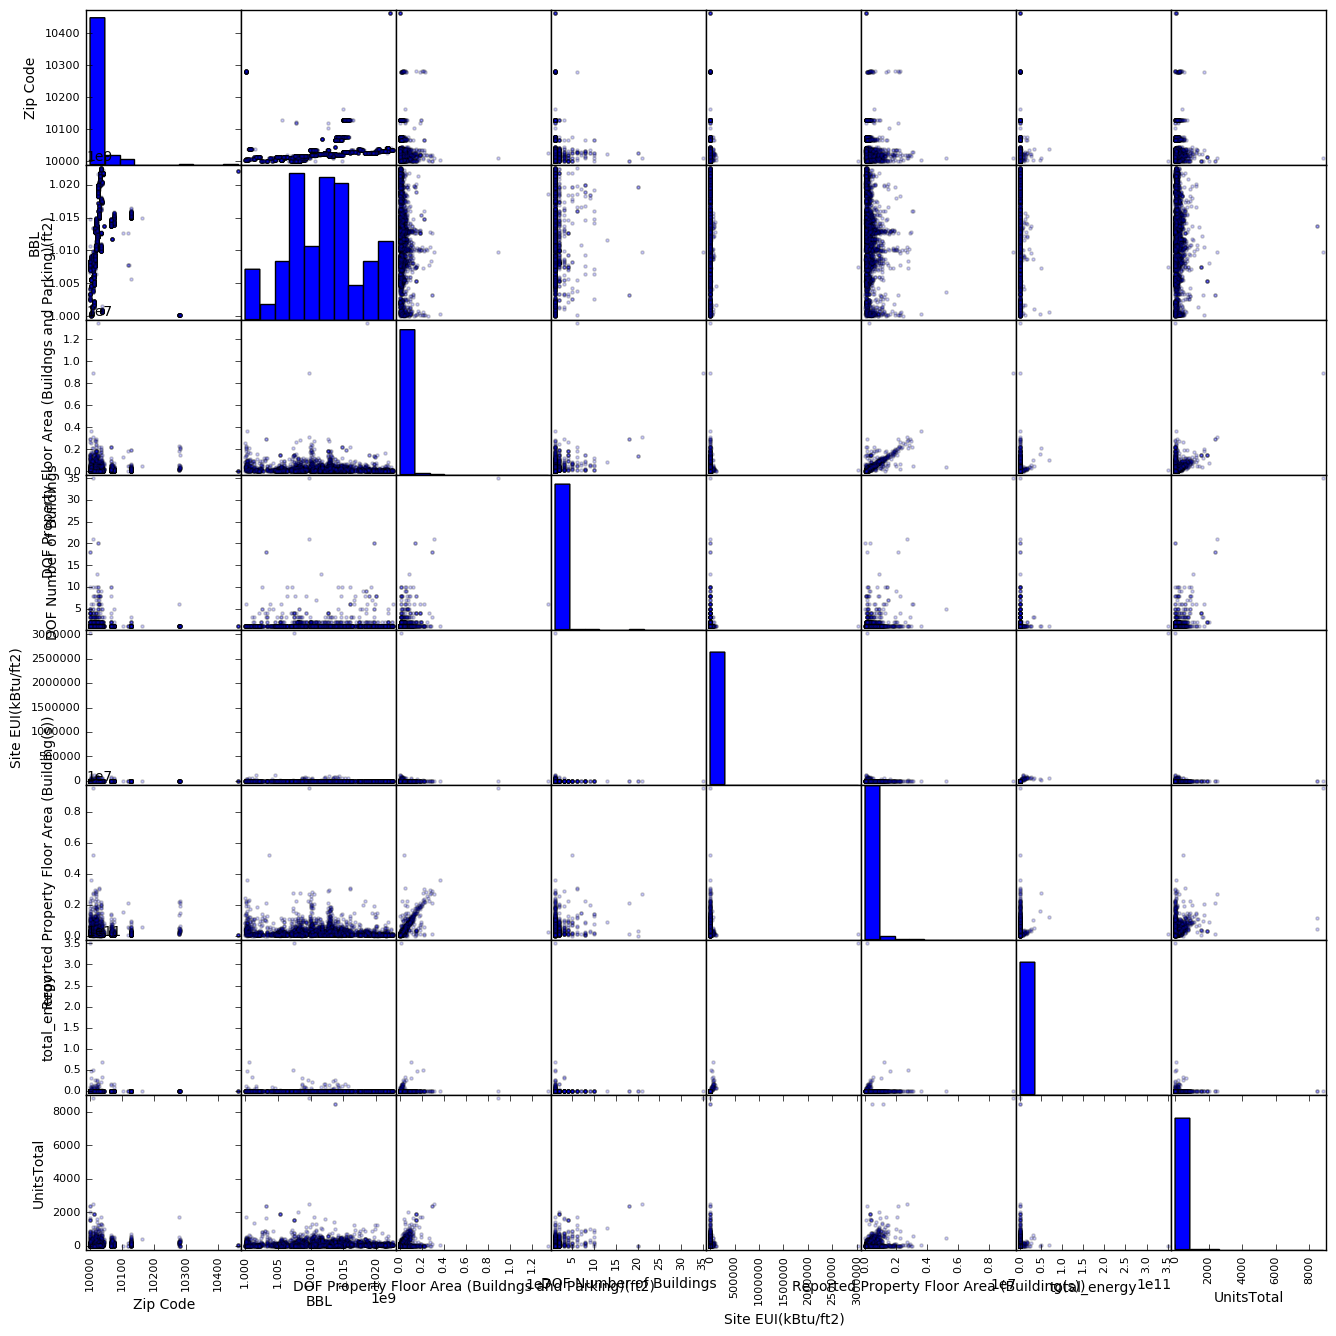

In [66]:
# Now the scatter matrix plot should show more columns.
scatter_matrix(bblnrgdata, figsize=(16, 16), alpha=0.2, diagonal='hist')


### Instructions

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

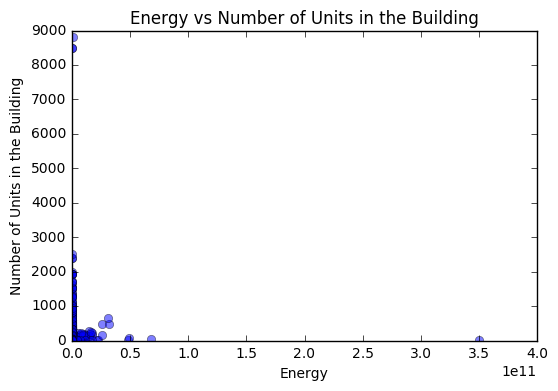

In [67]:
# first scatterplot
# zoomed out
x = bblnrgdata['total_energy'] 
y = bblnrgdata['UnitsTotal']
pl.plot(x, y, "o", color='blue', alpha=0.5)
pl.xlabel('Energy')
pl.ylabel('Number of Units in the Building')
pl.title('Energy vs Number of Units in the Building')
pl.show()

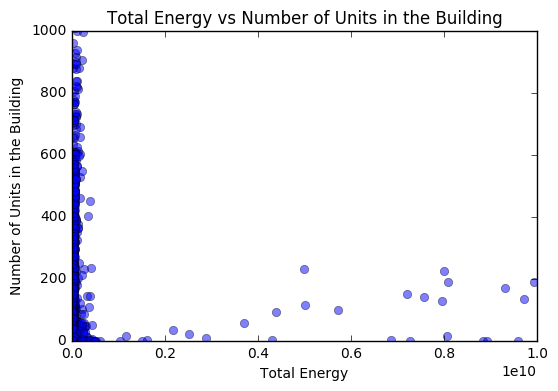

In [69]:
# next scatterplot
# zoomed in 
x = bblnrgdata['total_energy'] 
y = bblnrgdata['UnitsTotal']
pl.plot(x, y, "o", color='blue', alpha=0.5)
pl.xlabel('Total Energy')
pl.ylabel('Number of Units in the Building')
pl.title('Total Energy vs Number of Units in the Building')
pl.xlim(1000,1e10) 
pl.ylim(1,1000) 
pl.show()

#### when the points in a plot all look scrunched against the axis
#### **Try to make a log plot instead.** In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)
#### NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]
#### Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.

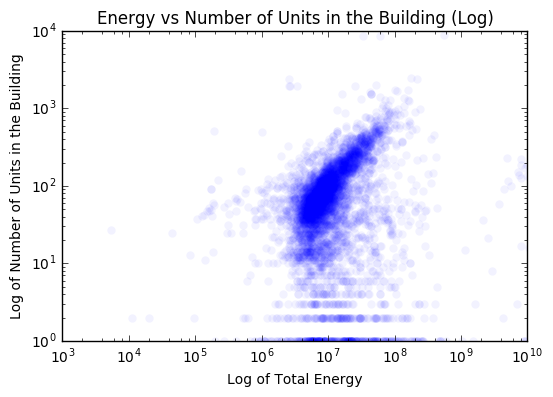

In [70]:
# log plot
fig = plt.figure()
ax = plt.gca()
ax.plot(x ,y, 'o', c='blue', alpha=0.05, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
pl.xlim(1000,1e10)
pl.ylim=(1,1000)
pl.xlabel('Log of Total Energy')
pl.ylabel('Log of Number of Units in the Building')
pl.title('Energy vs Number of Units in the Building (Log)')


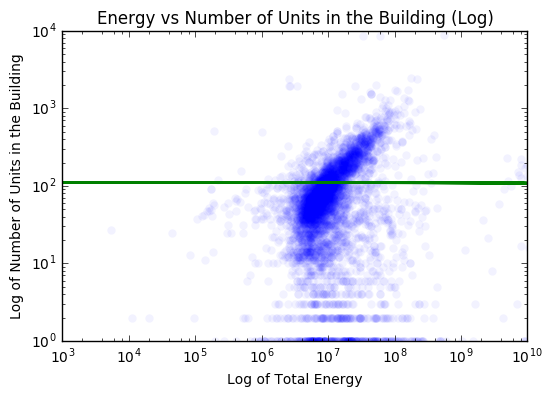

In [75]:
# line overlay plot
# I tried with this method, but doesn't seem right

m, b = np.polyfit(x, y, 1)

fig = plt.figure()
ax = plt.gca()
ax.plot(x ,y, 'o', c='blue', alpha=0.05, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
pl.xlim(1000,1e10)
pl.ylim=(1,1000)
pl.xlabel('Log of Total Energy')
pl.ylabel('Log of Number of Units in the Building')
pl.title('Energy vs Number of Units in the Building (Log)')
pl.plot(X_plot, X_plot*linmodel.params[0] + linmodel.params[1])
pl.plot(x, m*x + b, '-')
pl.show()


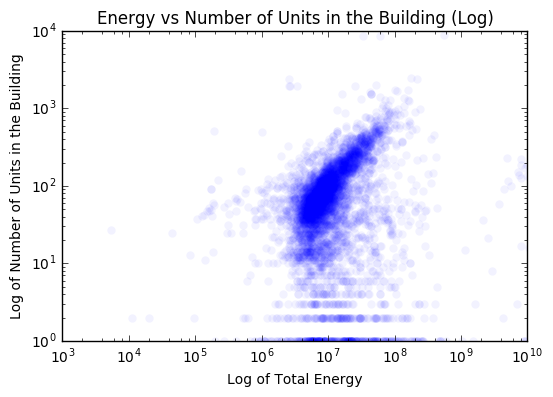

In [73]:
import statsmodels.api as sm

# line overlay plot
# I tried with this method, but don't see a line

X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN

X_plot = np.linspace(0,1,1000)

fig = plt.figure()
ax = plt.gca()
ax.plot(x ,y, 'o', c='blue', alpha=0.05, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
pl.xlim(1000,1e10)
pl.ylim=(1,1000)
pl.xlabel('Log of Total Energy')
pl.ylabel('Log of Number of Units in the Building')
pl.title('Energy vs Number of Units in the Building (Log)')
pl.plot(X_plot, X_plot*linmodel.params[0] + linmodel.params[1])
pl.show()


In [76]:
# summary of my model...i think?... 

print (linmodel.summary())

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 19 Oct 2016   Prob (F-statistic):                nan
Time:                        19:11:00   Log-Likelihood:                    nan
No. Observations:                5130   AIC:                               nan
Df Residuals:                    5130   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const               nan        nan        nan   